## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import np_utils
import csv
%matplotlib inline

Using TensorFlow backend.


In [2]:
def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

In [3]:
import csv
resultS1 = []
print("The result of Software 1.0\n")
for i in range(1,101):
    res = fizzbuzz(i)
    if(res != 'Other'):
        print(res);
        resultS1.append(res);
    else:
        print(i);
        resultS1.append(res);
testResS1 = []
with open('testing.csv', 'r') as rf:
    reader = csv.reader(rf, delimiter=',');
    for row in reader:
      testResS1.append(row[2]);
correct = 0
incorrect = 0
print("\n");
for i in range(1,101):
    if(resultS1[i-1]==testResS1[i]):
        correct = correct +1;
    else:
        incorrect = incorrect +1;
accuracyS1 = float(correct)/100;
print("Accuracy = ",accuracyS1);
print("Error = ", 1 - accuracyS1);
        

The result of Software 1.0

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


Accuracy =  1.0
Error =  0.0


## Create Training and Testing Datasets in CSV Format

In [4]:
def createInputCSV(start,end,filename):
    
    # Why list in Python? This is for storing the input i.e the numbers (1-100) and output i.e the labels (Fizz, Buzz, 
    #FizzBuzz and Other) as an ordered collection which cn be accessed and changed easily. It can also hold duplicates.
    # Duplicates are necessary as there are only 4 labels (outputData) but 100 input numbers 
    inputData   = []
    outputData  = []
    
    # Why do we need training Data? The computer learns just like a human being - using past data (or experiences). The 
    # training Data aids in accomplsishing just that. The computer uses the traning data to learn the pattern/trend to 
    # solve a particular problem. Here training data is a set of pairs of numbers (from 101-1001) and their labels (Fizz,Buzz etc.)
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe? Dataframe mimics a table. Here "input" and "label" are column names and inputData & outputData is the actual 
    # data (rows) under the two columns respectively. This helps us to visualize as well as tell the computer which input
    #number corresponds to which label. 
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [5]:
def processData(dataset):
    
    # Why do we have to process? 
    #The input are decimal numbers. We convert them to binary as 1's, 0's are faster to process by computer as it 
    #understands and interprets everything in binary.
    # The labels are strings, most ML algorithms require the input/output variables to be numeric. Its not always that
    # the data should be numeric just for running the algorithm, numeric data is important for the efficient implementation
    # of the algorithms. [Source: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/]
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [6]:
import numpy as np

def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10? The dataset of numbers we have extends till 1001 from 1. 
        # We need 10 bits to incorporate all the numbers in binary as 2^10 = 1024 i.e numbers till 0 - 1023 
        # can be represented in binary using 10 bit places. 2^9 = 512 so numbers after 511 cannot 
        # represented if only 9 bits or lesser are there. Hence 10 is appropriate.
        # The bellow code is converting all numbers into binary numbers using right shift operator and anding the result 
        # with 1 for all 10 bit places.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)


In [7]:
def encodeLabel(labels):  #labels are being given corresponding numbers in this encoding function
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])  #the lable "FizzBuzz" is encoded as the number 3
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])  #the lable "Fizz" is encoded as the number 1
        elif(labelInstance == "Buzz"):   
            # Buzz
            processedLabel.append([2])  #the lable "Buzz" is encoded as the number 2
        else:
            # Other
            processedLabel.append([0])  #the lable "Other" is encoded as the number 0

    return np_utils.to_categorical(np.array(processedLabel),4)

In [8]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

# Read Dataset
trainingData = pd.read_csv('training.csv')
testingData  = pd.read_csv('testing.csv')

# Process Dataset
processedTrainingData, processedTrainingLabel = processData(trainingData)
processedTestingData, processedTestingLabel   = processData(testingData)

training.csv Created!
testing.csv Created!


# Training the Model

In [9]:
# Defining Placeholder 
inputTensor  = tf.placeholder(tf.float32, [None, 10]) #placeholder variable that is an array which has 10 columns (10 digits of the binary number)
outputTensor = tf.placeholder(tf.float32, [None, 4])  #placeholder variable that is an array which has 4 columns (4 labels)

In [10]:
NUM_HIDDEN_NEURONS_LAYER_1 = 250
LEARNING_RATE = 0.2

# Initializing the weights to Normal Distribution
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape))

# Initializing the input to hidden layer weights
input_hidden_weights  = init_weights([10, NUM_HIDDEN_NEURONS_LAYER_1])
# Initializing the hidden to output layer weights
hidden_output_weights = init_weights([NUM_HIDDEN_NEURONS_LAYER_1, 4])

# Computing values at the hidden layer
hidden_layer = tf.nn.relu(tf.matmul(inputTensor, input_hidden_weights))
# Computing values at the output layer
output_layer = tf.matmul(hidden_layer, hidden_output_weights)

# Defining Error Function
error_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output_layer, labels=outputTensor))

# Defining Learning Algorithm and Training Parameters
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error_function)

# Prediction Function
prediction = tf.argmax(output_layer, 1)

In [11]:
NUM_OF_EPOCHS = 5000
BATCH_SIZE = 128

training_accuracy = []

with tf.Session() as sess:
    
    # Set Global Variables ? This function actually initializes and computes all the variables. In tensorflow the variables are 
    # represented without actually performing computation. Only after the above command the computaions are performed. 
    tf.global_variables_initializer().run()
    
    for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):
        
        #Shuffle the Training Dataset at each epoch
        p = np.random.permutation(range(len(processedTrainingData)))
        processedTrainingData  = processedTrainingData[p]
        processedTrainingLabel = processedTrainingLabel[p]
        
        # Start batch training
        for start in range(0, len(processedTrainingData), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                          outputTensor: processedTrainingLabel[start:end]})
        # Training accuracy for an epoch
        training_accuracy.append(np.mean(np.argmax(processedTrainingLabel, axis=1) ==
                             sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                             outputTensor: processedTrainingLabel})))
    # Testing
    predictedTestLabel = sess.run(prediction, feed_dict={inputTensor: processedTestingData})

## Tensorflow Model Definition

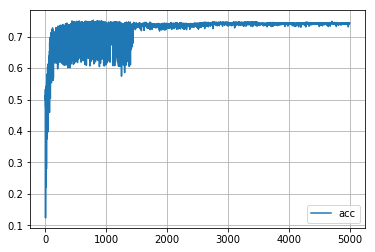

In [12]:
df = pd.DataFrame()
df['acc'] = training_accuracy
df.plot(grid=True)

In [13]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

# Testing the Model [Software 2.0]

In [14]:
wrong   = 0
right   = 0

predictedTestLabelList = []

for i,j in zip(processedTestingLabel,predictedTestLabel):
    predictedTestLabelList.append(decodeLabel(j))
    
    if np.argmax(i) == j:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testingData['input'].tolist()
testDataLabel = testingData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "mrudulay")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50290843")

predictedTestLabelList.insert(0, "")
predictedTestLabelList.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabelList

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 45  Correct :55
Testing Accuracy: 55.00000000000001
